In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("tennis_stats.csv")
print(df.head())
print(df.dtypes)



                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

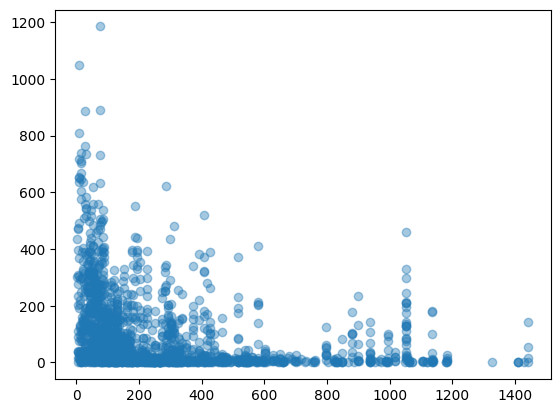

In [132]:
plt.scatter(df['Ranking'],df['Aces'], alpha = 0.4)
plt.show()

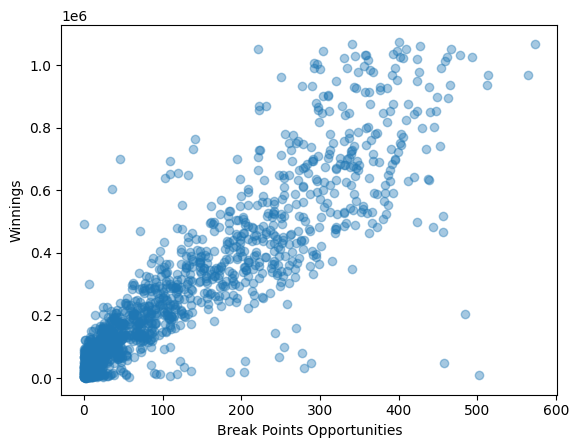

In [133]:
plt.scatter(df['BreakPointsOpportunities'],df['Winnings'], alpha = 0.4)
plt.xlabel("Break Points Opportunities")
plt.ylabel("Winnings")
plt.show()

Accuracy of single feature model: 0.01


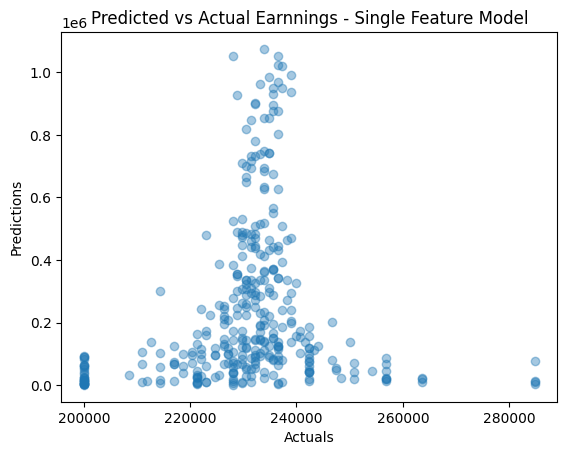

In [134]:
#Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns.
x = np.array(df['BreakPointsConverted'])
x = x.reshape(-1,1)
y = np.array(df['Winnings'])
y = y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)

print(f"Accuracy of single feature model: {round(model.score(x_test,y_test),2)}")

prediction = model.predict(x_test)
plt.scatter(prediction,y_test, alpha = 0.4)
plt.title('Predicted vs Actual Earnnings - Single Feature Model')
plt.xlabel('Actuals')
plt.ylabel("Predictions")
plt.show()

Accuracy of dual feature model: 0.07


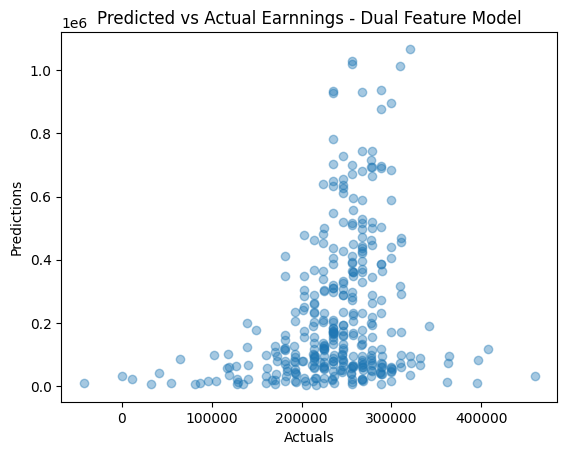

In [135]:
x = np.array(df[['BreakPointsConverted','FirstServeReturnPointsWon']])
y = np.array(df['Winnings'])
y = y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)

print(f"Accuracy of dual feature model: {round(model.score(x_test,y_test),2)}")

prediction = model.predict(x_test)
plt.scatter(prediction,y_test, alpha = 0.4)
plt.title('Predicted vs Actual Earnnings - Dual Feature Model')
plt.xlabel('Actuals')
plt.ylabel("Predictions")
plt.show()

Accuracy of multiple feature model: 0.8


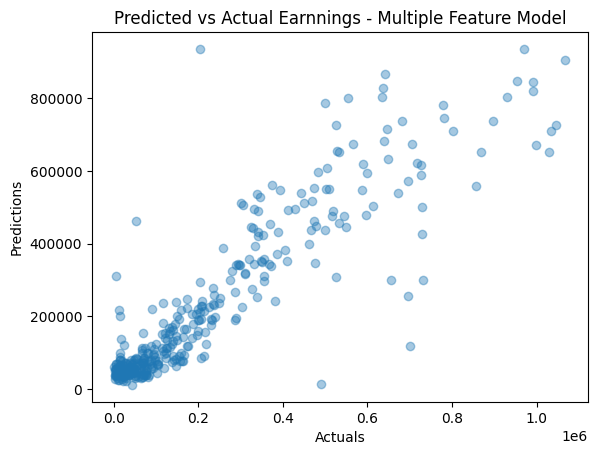

In [136]:
x = np.array(df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']])
y = np.array(df['Winnings'])
y = y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)

print(f"Accuracy of multiple feature model: {round(model.score(x_test,y_test),2)}")

prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha = 0.4)

plt.title('Predicted vs Actual Earnnings - Multiple Feature Model')
plt.xlabel('Actuals')
plt.ylabel("Predictions")
plt.show()